# Practice Time

#### Pythagorean Theorem
Write a function that returns the hypotenouse `c` given side `a` and `b`.

`4 ** 2` returns 16  
`3 ** 3` returns 27

In [217]:
import math
def pyth(a, b):
  c = math.sqrt((a**2) + (b**2))
  return c

#### Modulo Operator
Write a function that returns True if the integer is even, and False if the interger is Odd. Hint: use the modulo operator `%` to return the remainder.

`6 / 2` returns `3`; division  
`6 % 2` returns `0`; meaning that the remainder is 0

#### Baby's First Bioinformatics Step

Write functions for each of the following tasks:

    1. Count all different nucleotides (A, T, G, C) and store them into variables.
    2. Calculate GC% of the whole strand
    2. Convert DNA_string into RNA_string
    3. Convert the resulting RNA into an amino acid sequence

In [218]:
DNA_string = 'TGGAAGAGTTTAAGGCCAAGAATAGCAAATCTATCCACCACGATGATGGCACTTATTTCCTTAGTGCTTGTG'

#### Count all 4 Nucleotides

In [220]:
dna_seq = DNA_string
dna_count = dna_seq.count("A") + dna_seq.count("T") + dna_seq.count("G") + dna_seq.count("C")
print(dna_count)

72


#### Calculate GC %

In [221]:
gc_count = dna_seq.count("G") + dna_seq.count("C")
dna_fraction = gc_count / len(dna_seq)
print(dna_fraction)

0.4166666666666667


#### Convert DNA to RNA

In [222]:
rna_seq = print(dna_seq.replace("T", "U"))

UGGAAGAGUUUAAGGCCAAGAAUAGCAAAUCUAUCCACCACGAUGAUGGCACUUAUUUCCUUAGUGCUUGUG


#### Convert RNA to AA sequence

In [296]:
#AA_dct
#[rna_seq[i:i+3] for i in range(0, len(rna_seq),3)]
type(rna_seq)

aa_seq = print(rna_seq.map(AA_dct))

AttributeError: 'NoneType' object has no attribute 'map'

In [440]:
# Helper dictionary to accomplish #3

AA_dct = {
    # Phenylalanine
    'UUC':'F', 'UUU':'F',
    # Leucine
    'UUA':'L', 'UUG':'L', 'CUU':'L', 'CUC':'L','CUA':'L','CUG':'L', 
    # Isoleucine
    'AUU':'I', 'AUC':'I', 'AUA':'I', 
    # Methionine
    'AUG':'M', 
    # Valine
    'GUU':'V', 'GUC':'V', 'GUA':'V', 'GUG':'V', 
    # Serine
    'UCU':'S', 'UCC':'S', 'UCA':'S', 'UCG':'S', 'AGU':'S', 'AGC':'S', 
    # Proline
    'CCU':'P', 'CCC':'P', 'CCA':'P', 'CCG':'P', 
    # Threonine
    'ACU':'T', 'ACC':'T', 'ACA':'T', 'ACG':'T',
    # Alanine
    'GCU':'A', 'GCC':'A', 'GCA':'A', 'GCG':'A', 
    # Tyrosine
    'UAU':'Y', 'UAC':'Y', 
    # Histidine
    'CAU':'H', 'CAC':'H',
    # Glutamine
    'CAA':'Q', 'CAG':'Q', 
    # Asparagine
    'AAU':'N', 'AAC':'N', 
    # Lysine
    'AAA':'K', 'AAG':'K',
    # Aspartic Acid
    'GAU':'D', 'GAC':'D', 
    # Glutamic Acid
    'GAA':'E', 'GAG':'E',
    # Cystine
    'UGU':'C', 'UGC':'C',
    # Tryptophan
    'UGG':'W', 
    # Arginine
    'CGU':'R', 'CGC':'R', 'CGA':'R', 'CGG':'R', 'AGA':'R', 'AGG':'R', 
    # Glycine
    'GGU':'G',  'GGC':'G', 'GGA':'G', 'GGG':'G', 
    # Stop codon
    'UAA':'Stop', 'UGA':'Stop', 'UAG':'Stop'}

#### Baby's First Application

Load `codon.csv` using pandas. See https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html.

Do all the steps above to the single DNA strand in `codon.csv` and organize your results in a digestible way (as if you're going to show your PI your results!)

In [441]:
import pandas as pd
import numpy as np
pd.read_csv('codon.csv')

,Unnamed: 0,0
0,0,TGG
1,1,AAG
2,2,AGT
3,3,TTA
4,4,AGG
...,...,...
15227,15227,TAA
15228,15228,TAT
15229,15229,CAC
15230,15230,AAA


# Pandas Bioinformatics Practice

### Complete the following tasks. As always, there are multiple ways to solve these steps.

1) Load `codon.csv` and clean it by removing unnecessary column(s) and changing the column header name to `DNA`.  
2) Create three new columns: `RNA`, `AA`, and `weight` filled with appropriate data.  
3) Create a barplot of the 3 highest frequency amino acids.  
4) Create a boxplot of the codon weights.  
5) Create the descriptive summary statistics table for `weight`

### Harder Challenge (Google a lot, don't have to finish today)

6) Use the stop codon as a separator and create a new dataframe where each row is a new protein sequence. For example, the long string `ABCABCStopDEFSStop` is two protein sequences, `ABCABC` and `DEFS`.  
7) Create two new columns in the new dataframe, `length` of the protein sequence and `weight` of protein sequence.   
8) Create a descriptive summary statistics table for `length` and `weight`.  
9) Is there a relationship between the length and weight of protein sequences? Create a scatter plot comparing `length` and `weight` and include the regression line.  
10) What is the Pearson correlation coefficient?


# Pandas Bioinformatics Assignment

### 1) Load codon.csv and clean it by removing unnecessary column(s) and changing the column header name to DNA. 

In [589]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('codon.csv', names=['A',  'DNA'])
df.drop(df.columns[[0]], axis=1, inplace=True)
print(df)

       DNA
0      TGG
1      AAG
2      AGT
3      TTA
4      AGG
...    ...
15227  TAA
15228  TAT
15229  CAC
15230  AAA
15231  CTT

[15232 rows x 1 columns]


### 2) Create three new columns: RNA, AA, and weight filled with appropriate data.

In [590]:
# Helper dictionary for step 2

weights = {'A': 71.04, 'C': 103.01, 'D': 115.03, 'E': 129.04, 'F': 147.07,
           'G': 57.02, 'H': 137.06, 'I': 113.08, 'K': 128.09, 'L': 113.08,
           'M': 131.04, 'N': 114.04, 'P': 97.05, 'Q': 128.06, 'R': 156.10,
           'S': 87.03, 'T': 101.05, 'V': 99.07, 'W': 186.08, 'Y': 163.06 }


In [591]:
# Make Columns 
df['RNA'] = df['DNA'].str.replace("T", "U")
df['AA'] = df['RNA'].replace(AA_dct)
df['weight'] = df['AA'].replace(weights)
print(df)

       DNA  RNA    AA  weight
0      TGG  UGG     W  186.08
1      AAG  AAG     K  128.09
2      AGT  AGU     S   87.03
3      TTA  UUA     L  113.08
4      AGG  AGG     R   156.1
...    ...  ...   ...     ...
15227  TAA  UAA  Stop    Stop
15228  TAT  UAU     Y  163.06
15229  CAC  CAC     H  137.06
15230  AAA  AAA     K  128.09
15231  CTT  CUU     L  113.08

[15232 rows x 4 columns]


### 3) Create a barplot of the 3 highest frequency amino acids.

  Frequency AA
0      1764  L
1      1413  S
2       952  G


<AxesSubplot:xlabel='AA'>

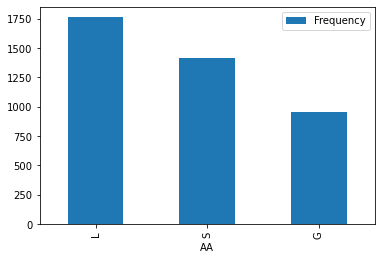

In [592]:
# Find aa frequency 
df["AA"].value_counts()[0:3]

## Backup code to doublecheck
#df[["DNA","RNA","AA", "weight"]].describe(include='all')

#Make mini data frame to isolate values for barplot
df_aa = pd.DataFrame({'Frequency':['1764','1413','952'],'AA':['L','S','G']})
print(df_aa)

#Make barplot
df_aa.Frequency=pd.to_numeric(df_aa.Frequency)
df_aa.plot(kind='bar', x='AA', y='Frequency')

### 4) Create a boxplot of the codon weights.

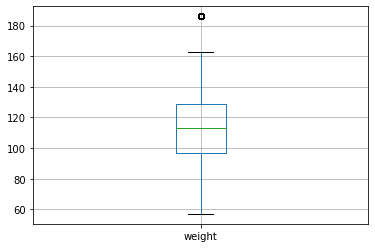

In [593]:
##Make boxplot of codon weights
df['weight'] = pd.to_numeric(df['weight'],errors='coerce') #errors=’coerce’ > transform the non-numeric values into NaN
boxplot = df.boxplot(column=['weight'])

### 5) Create the descriptive summary statistics table for weight

In [594]:
## Describe Summary statistics for codon weight
df[["weight"]].describe(include='all')

,weight
count,14451.000000
mean,112.295409
std,28.622844
min,57.020000
25%,97.050000
50%,113.080000
75%,129.040000
max,186.080000


### 6) Use the stop codon as a separator and create a new dataframe where each row is a new protein sequence. For example, the long string ABCABCStopDEFSStop is two protein sequences, ABCABC and DEFS

In [595]:
# Making the DNA column a string variable to modify it
dna_string = df['AA'].astype('string')

#concatenatin the string into one long string
x = ''.join(dna_string) #x=long string

#splitting the long string using 'STOP' as a separator
x1 = x.split("Stop")

#making a dataframe from column of separated AA
df2 = pd.DataFrame(data=x1)
df2.columns =['AA']
print(df2)

                                                    AA
0    WKSLRPRIANLSTTMMALISLVLVVVPPGEQEGLDASYLPPPLPSF...
1     GCLKLCLCWLDEDGTLAVEYFSVQIPSLLPFDFLFFFFFFLLQCLGSC
2                                               FAENNW
3                                              VFKCRIL
4                                                HHIVL
..                                                 ...
777                      KVTNHFNVYLLISMCSCNMGIVLCVCMYF
778                                            TFIMKIL
779                                               GTQK
780                                                 RR
781                                               YHKL

[782 rows x 1 columns]


In [596]:
dna_string = df['AA'].astype('string')

### 7) Create two new columns in the new dataframe, length of the protein sequence and weight of protein sequence.

In [597]:
#make lengths column 
df2['length'] = df2['AA'].str.len()

##Fill in weights column with appopriate values (sum of associated weights)

#put row 1 into a container
row = df2['AA'][0]   

In [598]:
#make a for loop 
lst =[] #empty container
for i in row:
    lst.append(weights[i]) #make column of weight values for first row

In [599]:
#lst

In [600]:
sum(lst) #add up the weight values of first row

5668.000000000001

In [601]:
#Make a function that sums up all of hte values in 1 row
def weights_sum(rows): #rows is the argument needed for the function
    lst =[]
    for i in rows:
        lst.append(weights[i])
    return sum(lst) #the return value of the function
    

In [602]:
df2['weights'] = df2['AA'].apply(weights_sum) #.apply applies a function to every row

In [603]:
df2

,AA,length,weights
0,WKSLRPRIANLSTTMMALISLVLVVVPPGEQEGLDASYLPPPLPSF...,53,5668.00
1,GCLKLCLCWLDEDGTLAVEYFSVQIPSLLPFDFLFFFFFFLLQCLGSC,48,5528.64
2,FAENNW,6,761.31
3,VFKCRIL,7,859.50
4,HHIVL,5,599.35
...,...,...,...
777,KVTNHFNVYLLISMCSCNMGIVLCVCMYF,29,3326.50
778,TFIMKIL,7,846.49
779,GTQK,4,414.22
780,RR,2,312.20


### 8) Create a descriptive summary statistics table for length and weight

In [604]:
df2[["length",'weights']].describe(include='all')

,length,weights
count,782.000000,782.000000
mean,18.479540,2075.167455
std,21.440122,2374.881799
min,0.000000,0.000000
25%,4.000000,453.197500
50%,12.000000,1280.155000
75%,24.000000,2700.617500
max,141.000000,14810.470000


### 9) Is there a relationship between the length and weight of protein sequences? Create a scatter plot comparing length and weight and include the regression line.

#### Yes! They are dependent variables becuse they're from the same sequences. As the length of a seqeunce increases, so will the weights. 


<AxesSubplot:xlabel='length', ylabel='weights'>

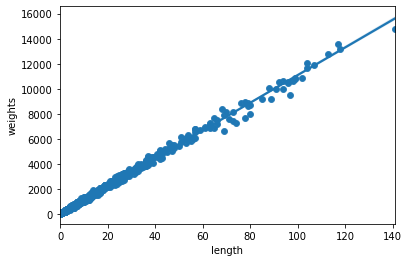

In [570]:
#df2 is new dataset name 
sns.regplot(data=df2, x="length", y="weights")

#other ways to make plots using seaborn
#sns.scatterplot(data=df2, x="length", y="weights")
#sns.lmplot(data=df2, x="length", y="weights")

### 10) What is the Pearson correlation coefficient?



#### Pearson's correlation coefficient is a measure of how closely related two variables are using a linear association. However it doesn't account for the difference between dependent and independent variables or provide information of the slope of the line. 